## Name: Mariam Badure
## Roll No: 04
## PID: 246002
## Batch: 1
## SE-AIML
## 28/1/2026
## Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

## LR USing OLS

In [1]:
# Step1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step2: Input data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [3]:
# Step3: Create model and Fit data
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [4]:
# Step4: Get coefficients and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w} ")
print(f"The intercept is: {b} ")

The slope is: 1.4999999999999993 
The intercept is: 0.3333333333333348 


In [5]:
# Step5: Make predictions
y_pred = model.predict(x)
print(f"Prediction for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Prediction for training data
x = 1, Actual y = 2, Predicted y = 1.8333333333333341
x = 2, Actual y = 3, Predicted y = 3.3333333333333335
x = 3, Actual y = 5, Predicted y = 4.833333333333333


In [6]:
# Step6: error calculation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse} ")
print(f"R2_Score Error is: {r2} ")

Mean Squared Error is: 0.05555555555555553 
R2_Score Error is: 0.9642857142857143 


## LR USing MLE

In [7]:
# Step1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [8]:
# Step2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [9]:
# Step3: Negative log likelihood function
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1 #Assume variance=1
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2)
    return nll

In [10]:
# Initial values for w and b 
initial_guess = [0,0]


In [11]:
# Step4: Minimize nll
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}")
print(f"Intercept is: {b_mle}")

Slope is: 1.500000003897125
Intercept is: 0.3333333918730798


In [12]:
# Step5: Prediction
y_pred = w_mle*x + b_mle
print(f"Prediction for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


Prediction for training data
x = 1, Actual y = 2, Predicted y = 1.833333395770205
x = 2, Actual y = 3, Predicted y = 3.33333339966733
x = 3, Actual y = 5, Predicted y = 4.833333403564454


In [13]:
# Step6: error calculation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse} ")
print(f"R2_Score Error is: {r2} ")

Mean Squared Error is: 0.05555555555556004 
R2_Score Error is: 0.9642857142857114 


## LR USing GD

In [14]:
# Step1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [15]:
# Step2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [16]:
# Step3: 
w, b = 0,0
alpha = 0.001
n_iter = 1000
n = len(x)

In [17]:
for i in range(n_iter):
    y_pred = w*x.flatten() + b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w-alpha*dw
    b -= alpha*db
print(f"The Slope is: {w} ")
print(f"The Bias is: {b} ")

The Slope is: 1.4053515088658695 
The Bias is: 0.5484380558026539 


## LR USing GD with single parameter

In [24]:
# Step1: imports
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Step2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])
n = len(x)

In [26]:
# Step3: Calculate loss function
def loss(wl):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1*x + w0
    return np.sum((y-y_pred)**2)

In [31]:
# Step4: Calculate gradient of J w.r.t w1
def gradient(w1):
     w0 = np.mean(y) - w1*np.mean(x)
     y_pred = w1*x + w0
     return -2*np.sum(x*(y-y_pred))
    

In [32]:
# Gradient decent
lr = 0.1
w1 = 4
n_iter = 15
w1_values = []
loss_values = []

for i in range(n_iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad


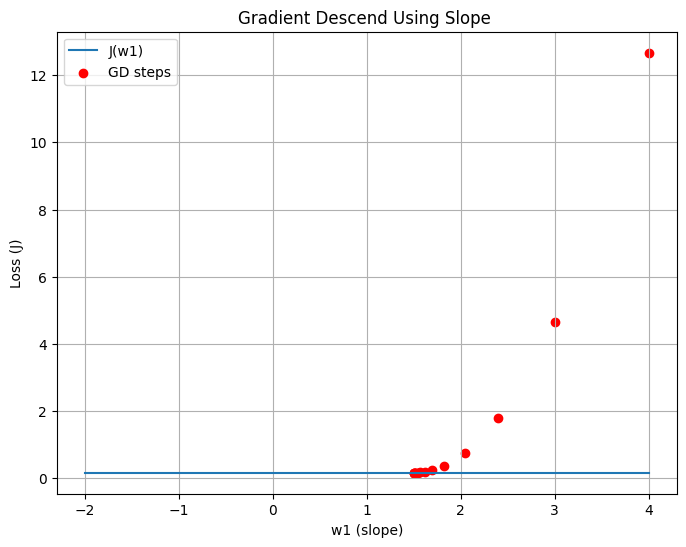

In [35]:
# Step6: Plot loss function and GD
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8, 6))
plt.plot(w_space, loss_space, label = "J(w1)")
plt.scatter(w1_values, loss_values, color = "red", label = "GD steps" )
plt.xlabel("w1 (slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient Descend Using Slope ")
plt.legend()
plt.grid(True)
plt.show()